DATA PREPROCESSING  

1. Import the necessary libraries  

2. Load the dataset  
```python
df = pd.read_csv("ago/USA_Housing.csv")
print(df.head())
```

View the data 
```python
df.info()  
df.dtypes.value_counts()   
df.isnull().sum()   
```

3. Statistical Analysis 
```python  
df.desrcibe(include='all') 
 
# New df with only numeric features
numeric_df = df.select_dtypes(include=[int, float])
```

4.  Check the outliers  

5. Drop the ourliers

6. Correlation  


In [56]:
# Data Preprocessing

# 1. Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [57]:
# 2. Load the dataset
df = pd.read_csv("ago/USA_Housing.csv")
print(df.head())


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [58]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [59]:
# Check the data types
df.dtypes.value_counts()

float64    6
object     1
Name: count, dtype: int64

In [60]:
# Check the null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [61]:
# 3. Statistical Analysis
df.describe(include='all')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5000
top,NaN,NaN,NaN,NaN,NaN,NaN,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,NaN
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,NaN
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,NaN


In [62]:
# Select only numeric columns (by default, includes int64 and float64)
numeric_df = df.select_dtypes(include=[int, float])
numeric_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


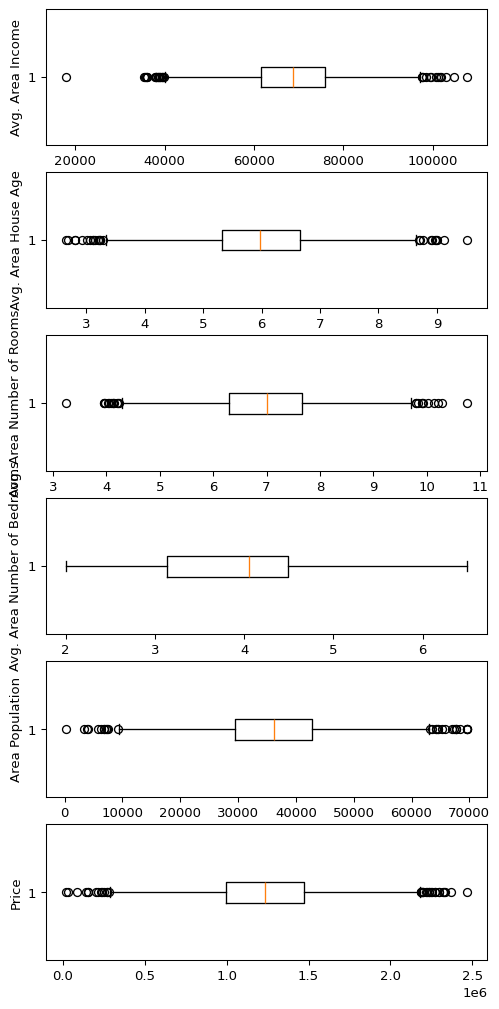

In [63]:
# Check for outliers
# Determine number of columns and set dynamic number of subplots
num_cols = len(numeric_df.columns)

# Create a subplot with num_cols rows and 1 column
fig, axs = plt.subplots(num_cols, 1, dpi=95, figsize=(6,13))

# If there's only one column, wrap axs in a list
if num_cols == 1:
    axs = [axs]

# Loop through the columns and create box plots
i = 0
for col in numeric_df:
    axs[i].boxplot(df[col], vert=False)  # Create horizontal box plot
    axs[i].set_ylabel(col)               # Label each plot with column name
    i += 1

plt.show()


In [64]:
# Drop Outliers

# Identify the 1st (Q1) and 3rd (Q3) quartiles
q1, q3 = np.percentile(df['Avg. Area Income'], [25, 75])
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Calculate the lower and upper bounds for detecting outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers from the DataFrame
clean_data = df[(df['Avg. Area Income'] >= lower_bound) & (df['Avg. Area Income'] <= upper_bound)]
# Print the number of outliers removed
print(f"Original dataset size: {len(df)}")
print(f"Clean dataset size: {len(clean_data)}")

# Identify the 1st (Q1) and 3rd (Q3) quartiles
q1, q3 = np.percentile(clean_data['Avg. Area House Age'], [25, 75])
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Calculate the lower and upper bounds for detecting outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers from the DataFrame
clean_data = clean_data[(clean_data['Avg. Area House Age'] >= lower_bound) & (clean_data['Avg. Area House Age'] <= upper_bound)]
# Print the number of outliers removed
print(f"Clean dataset size: {len(clean_data)}")

# Identify the 1st (Q1) and 3rd (Q3) quartiles
q1, q3 = np.percentile(clean_data['Avg. Area Number of Rooms'], [25, 75])
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Calculate the lower and upper bounds for detecting outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers from the DataFrame
clean_data = clean_data[(clean_data['Avg. Area Number of Rooms'] >= lower_bound) & (clean_data['Avg. Area Number of Rooms'] <= upper_bound)]
# Print the number of outliers removed
print(f"Clean dataset size: {len(clean_data)}")

# Identify the 1st (Q1) and 3rd (Q3) quartiles
q1, q3 = np.percentile(clean_data['Avg. Area Number of Bedrooms'], [25, 75])
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Calculate the lower and upper bounds for detecting outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers from the DataFrame
clean_data = clean_data[(clean_data['Avg. Area Number of Bedrooms'] >= lower_bound) & (clean_data['Avg. Area Number of Bedrooms'] <= upper_bound)]
# Print the number of outliers removed
print(f"Clean dataset size: {len(clean_data)}")

# Identify the 1st (Q1) and 3rd (Q3) quartiles
q1, q3 = np.percentile(clean_data['Area Population'], [25, 75])
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Calculate the lower and upper bounds for detecting outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers from the DataFrame
clean_data = clean_data[(clean_data['Area Population'] >= lower_bound) & (clean_data['Area Population'] <= upper_bound)]
# Print the number of outliers removed
print(f"Clean dataset size: {len(clean_data)}")

# Identify the 1st (Q1) and 3rd (Q3) quartiles
q1, q3 = np.percentile(clean_data['Price'], [25, 75])
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Calculate the lower and upper bounds for detecting outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers from the DataFrame
clean_data = clean_data[(clean_data['Price'] >= lower_bound) & (clean_data['Price'] <= upper_bound)]
# Print the number of outliers removed
print(f"Clean dataset size: {len(clean_data)}")

Original dataset size: 5000
Clean dataset size: 4968
Clean dataset size: 4943
Clean dataset size: 4918
Clean dataset size: 4918
Clean dataset size: 4889
Clean dataset size: 4856


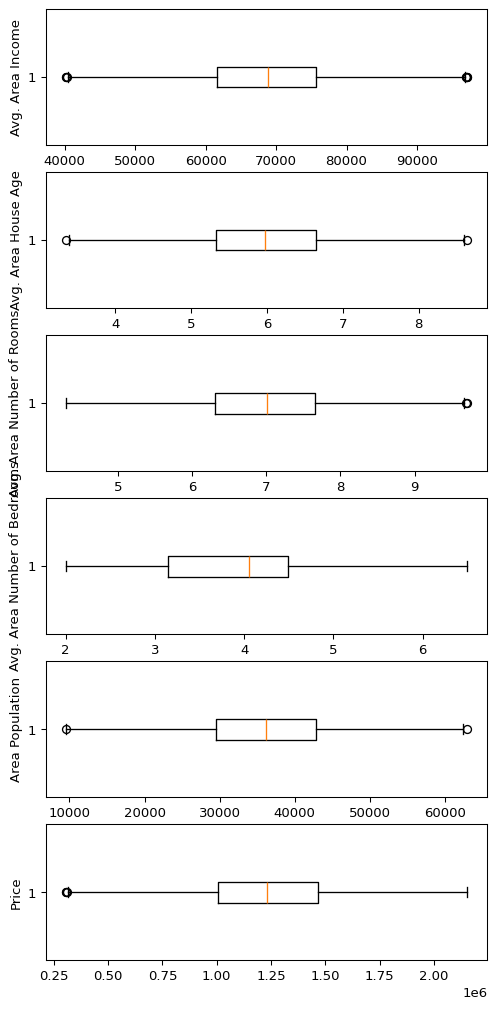

In [65]:
# Select only numeric columns (by default, includes int64 and float64)
numeric_df_clean = clean_data.select_dtypes(include=[int, float])

# Boxplot without outliers
num_cols = len(numeric_df_clean.columns)
fig, axs = plt.subplots(num_cols, 1, dpi=95, figsize=(6,13))

# Loop through the columns and create box plots
i = 0
for col in numeric_df_clean:
    axs[i].boxplot(numeric_df_clean[col], vert=False)  # Create horizontal box plot
    axs[i].set_ylabel(col)               # Label each plot with column name
    i += 1

plt.show()